In [1]:
import os
import os.path as osp
import sys
sys.path.insert(0, osp.dirname(osp.abspath(".")))

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pickle
from multimedia.container.msv import MultiStreamVideo

In [3]:
VIDEO_DIR = "../resource/dataset/"

In [4]:
msv_files = [ osp.join(VIDEO_DIR, f) for f in os.listdir(VIDEO_DIR) ]

In [7]:
all_bboxes = []

for f in msv_files:
    print("Processing {}".format(f))
    video = MultiStreamVideo(f)
    
    bboxes = []
    while True:
        frames = video.read()
        if frames['video'] is None:
            break
        bodyposes = frames['bodyposes']
        for pose in bodyposes:
            bbox = pose['bbox']
            bboxes.append(bbox)
            
    all_bboxes.append(np.array(bboxes))

Processing ../resource/dataset/5p_da_um_up.msv
Processing ../resource/dataset/5p_da_um_pp.msv
Processing ../resource/dataset/3p_da_um_pp.msv
Processing ../resource/dataset/5p_sa_um_up.msv
Processing ../resource/dataset/5p_sa_um_pp.msv
Processing ../resource/dataset/5p_sa_pm_up.msv
Processing ../resource/dataset/5p_sa_pm_pp.msv
Processing ../resource/dataset/3p_sa_um_pp.msv
Processing ../resource/dataset/3p_da_pm_up.msv
Processing ../resource/dataset/5p_da_pm_pp.msv
Processing ../resource/dataset/3p_sa_um_up.msv
Processing ../resource/dataset/5p_da_pm_up.msv
Processing ../resource/dataset/3p_da_um_up.msv
Processing ../resource/dataset/3p_sa_pm_pp.msv
Processing ../resource/dataset/3p_sa_pm_up.msv
Processing ../resource/dataset/3p_da_pm_pp.msv


In [10]:
all_areas = []
for bboxes in all_bboxes:
    areas = (bboxes[:, 2]-bboxes[:, 0])*(bboxes[:, 3]-bboxes[:, 1])
    all_areas.append(areas)

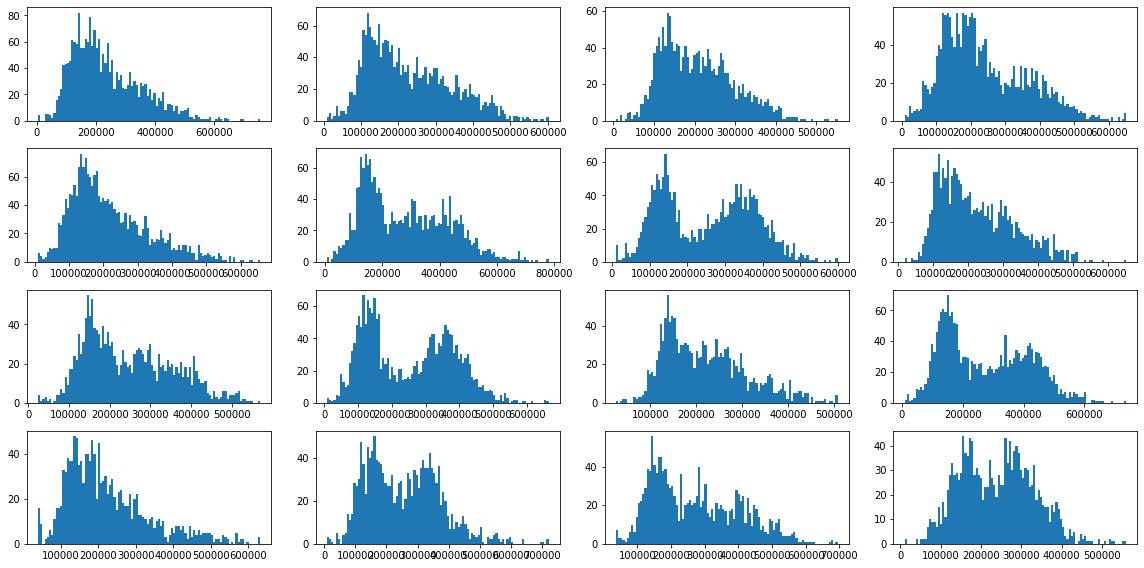

In [12]:
nrows = 4
ncols = 4

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 8))

for i in range(nrows):
    for j in range(ncols):
        idx = i*ncols + j
        areas = all_areas[idx]
        axes[i][j].hist(areas, bins=100)

plt.tight_layout()

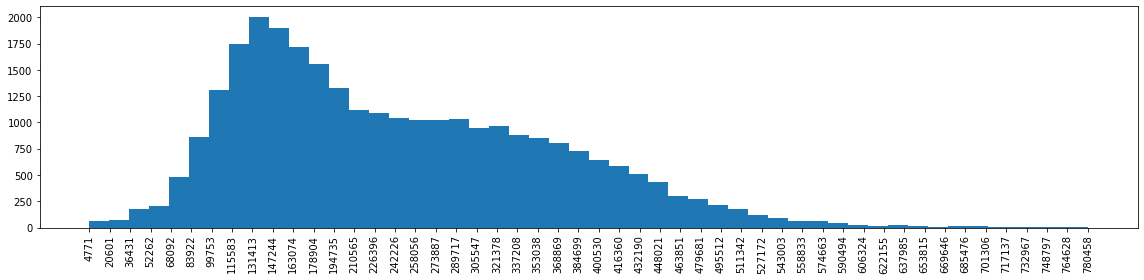

In [19]:
areas = np.concatenate(all_areas)
xmax = np.max(areas)
xmin = np.min(areas)

bins = 50
ticks = np.linspace(xmin, xmax, bins)
plt.figure(figsize=(16, 4))
plt.xticks(ticks, rotation=90)
plt.hist(areas, bins=bins)
plt.tight_layout()

In [ ]:
# max limit 511340
# min limit 36430